<a href="https://colab.research.google.com/github/Poonge1598/Multiclass_E-mail_classifier/blob/main/multi-class_mail_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv('train.csv',index_col=0)

In [ ]:
data.head(10)

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2
1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961,1
2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149,1
3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296,1
4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355,1
5,"Sun, 13 Dec 2015 18:44:00 +0530",iiitd,ac.in,5,0,multipart/alternative,2,14,1,0,78.0,8365,3
6,"Wed, 9 Sep 2015 06:18:29 +0000 (UTC)",piazza,com,0,0,multipart/alternative,0,11,1,1,31.0,3357,1
7,"Wed, 23 Aug 2017 10:29:45 +0000",in,ibm.com,0,0,multipart/related,0,4,1,1,218.0,15862,1
8,"Sat, 19 May 2018 13:56:53 +0000",redwolf,in,0,0,multipart/alternative,14,39,0,0,49.0,8011,1
9,"Mon, 14 May 2018 01:41:53 +0000",m,mail.coursera.org,0,0,multipart/alternative,25,131,0,1,18.0,92248,1


In [ ]:
data['org'].nunique()

1038

In [ ]:
data['tld'].nunique()

291

In [ ]:
data['date'].nunique()

47279

In [ ]:
data['org'].value_counts()

iiitd          19943
usebackpack     5070
google          3890
amazon          3123
linkedin        2371
               ...  
i                  1
epic               1
paytmoffers        1
techject           1
freedns            1
Name: org, Length: 1038, dtype: int64

In [ ]:
pd.unique(data['bcced'])

array([0, 1], dtype=int64)

In [ ]:
pd.unique(data['ccs'])

array([  0,   1,   5,   2,   4,   9,   6,  20,   3,  11,  74,   7,   8,
        14,  17,  10,  13, 155,  15,  22,  19,  12,  16,  76,  18,  35,
        46,  83,  39, 179, 154,  99,  68,  44,  65], dtype=int64)

In [ ]:
data.isnull().sum()

date                   0
org                 3451
tld                 3453
ccs                    0
bcced                  0
mail_type            172
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject      16
chars_in_body          0
label                  0
dtype: int64

In [ ]:
data.shape

(80176, 13)

**Visualizations**

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='label', ylabel='count'>

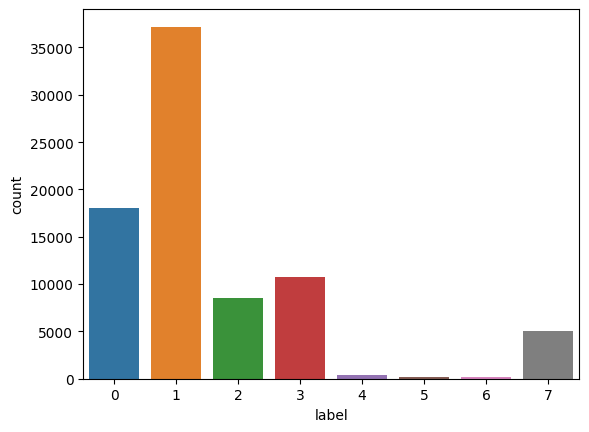

In [ ]:
sns.countplot(x='label',data=data)

<Axes: xlabel='mail_type', ylabel='count'>

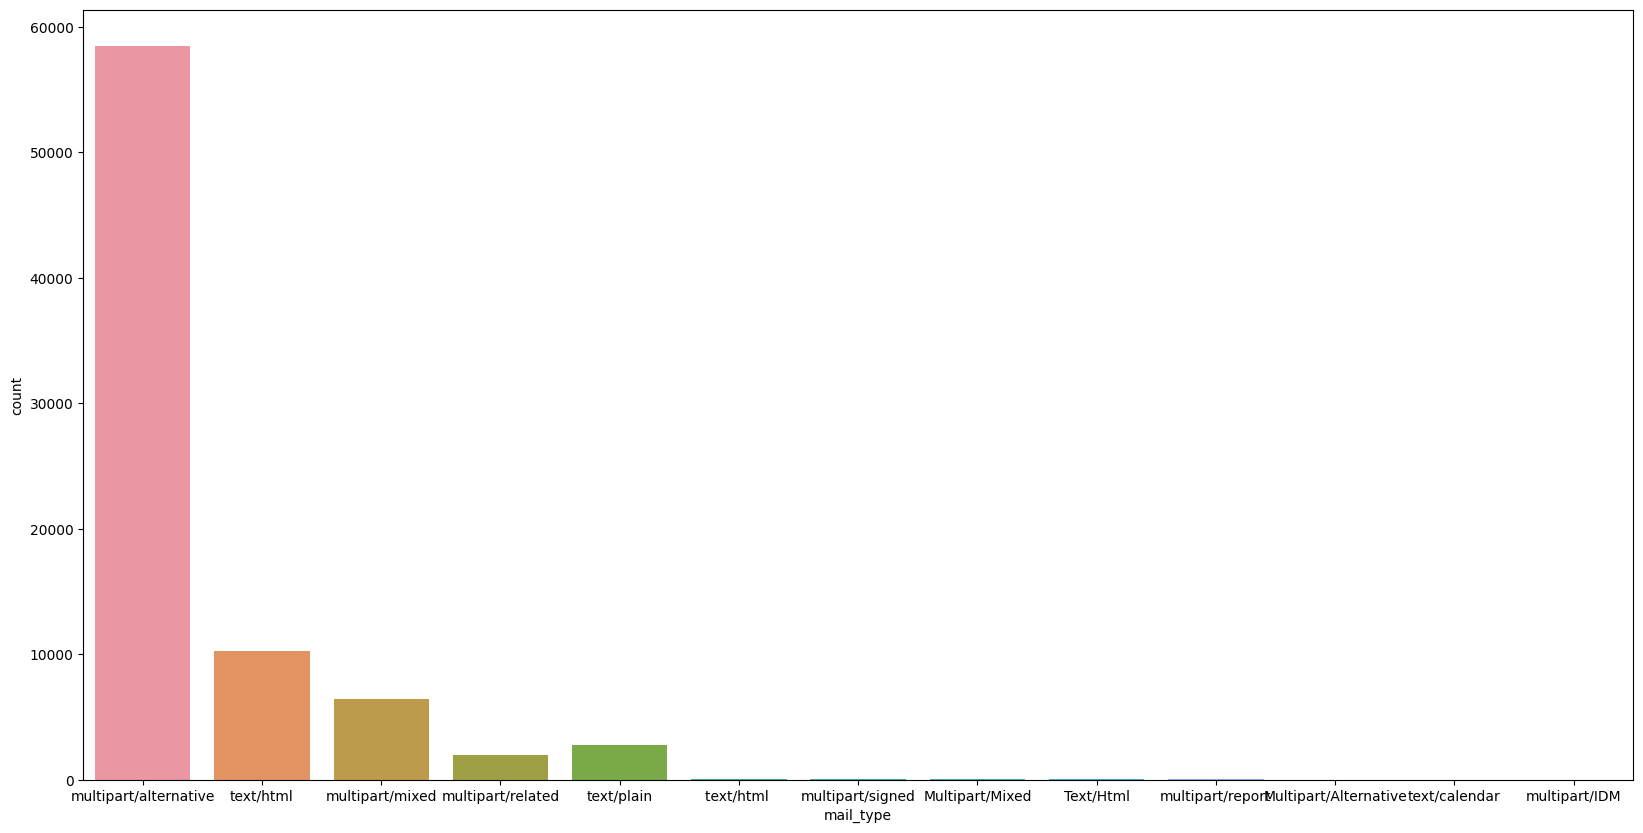

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='mail_type',data=data)

**Handling missing data**

In [ ]:
data.isna().sum()

date                   0
org                 3451
tld                 3453
ccs                    0
bcced                  0
mail_type            172
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject      16
chars_in_body          0
label                  0
dtype: int64

In [ ]:
data['org'].fillna('Unknown', inplace=True)
data['tld'].fillna('Unknown', inplace=True)


In [ ]:
common_mail_type = data['mail_type'].mode()[0]
data['mail_type'].fillna(common_mail_type, inplace=True)


In [ ]:
median_char=data['chars_in_subject'].median()
data['chars_in_subject'].fillna(median_char,inplace=True)

In [ ]:
data.isna().sum()

date                0
org                 0
tld                 0
ccs                 0
bcced               0
mail_type           0
images              0
urls                0
salutations         0
designation         0
chars_in_subject    0
chars_in_body       0
label               0
dtype: int64

**Preprocessing**

"Date" column

In [ ]:
import datefinder as df

In [ ]:
data['date'][0]

'Mon, 6 Nov 2017 11:13:45 +0100'

In [ ]:
data['date'][0][:(data['date'][0].find(','))]

'Mon'

In [ ]:
list(df.find_dates(data['date'][0]))[0].month

11

In [ ]:
data[data['chars_in_subject'].isna()]

,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label


In [ ]:
data.select_dtypes(['object']).columns.tolist()

['date', 'org', 'tld', 'mail_type']

**Removing timezone mentioned within the brackets**

In [ ]:
data['date_format']=data['date'].str.replace(r'\s*\([A-Z]+\)$', '', regex=True)

**Adding year,month,day of week and hours**

In [ ]:
data['year']=data['date'].apply(lambda x:list(df.find_dates(x))[0].year)

In [ ]:
data['month']=data['date'].apply(lambda x:list(df.find_dates(x))[0].month)

In [ ]:
data['DayOfWeek']=data['date'].apply(lambda x:list(df.find_dates(x))[0].weekday())

In [ ]:
data['mail_type'].value_counts()

multipart/alternative    58621
text/html                10224
multipart/mixed           6461
text/plain                2720
multipart/related         1996
text/html                   58
Multipart/Mixed             39
multipart/signed            26
multipart/report            13
Text/Html                   10
text/calendar                4
Multipart/Alternative        3
multipart/IDM                1
Name: mail_type, dtype: int64

In [ ]:
data.iloc[27458]['mail_type'].lower()

'multipart/alternative'

In [ ]:
data['mail_type']=data['mail_type'].str.lower()

In [ ]:
data['mail_type'].value_counts()

multipart/alternative    58624
text/html                10234
multipart/mixed           6500
text/plain                2720
multipart/related         1996
text/html                   58
multipart/signed            26
multipart/report            13
text/calendar                4
multipart/idm                1
Name: mail_type, dtype: int64

In [ ]:
data['mail_type_1']=data['mail_type'].apply(lambda x:x[:x.find('/')] if type(x)==str else x)

In [ ]:
data['mail_type_1'].value_counts()

multipart    67160
text         13016
Name: mail_type_1, dtype: int64

In [ ]:
data['mail_type_2']=data['mail_type'].apply(lambda x:x[x.find('/')+1:] if type(x)==str else x)

In [ ]:
data['mail_type_2'].value_counts()

alternative    58624
html           10234
mixed           6500
plain           2720
related         1996
html              58
signed            26
report            13
calendar           4
idm                1
Name: mail_type_2, dtype: int64

**Function to preprocess date field - Clubbing all the previously executed changes**

In [ ]:
def preprocess(data):
  data['year']=data['date'].apply(lambda x:list(df.find_dates(x))[0].year)
  data['month']=data['date'].apply(lambda x:list(df.find_dates(x))[0].month)
  data['DayOfWeek']=data['date'].apply(lambda x:list(df.find_dates(x))[0].weekday())
  data['mail_type']=data['mail_type'].str.lower()
  data['mail_type_1']=data['mail_type'].apply(lambda x:x[:x.find('/')] if type(x)==str else x)
  data['mail_type_2']=data['mail_type'].apply(lambda x:x[x.find('/')+1:] if type(x)==str else x)
  return data


Working with 'org' and 'tld' column(numerous categories)

In [ ]:
count=data['org'].value_counts()

In [ ]:
count

iiitd                 19943
usebackpack            5070
google                 3890
Unknown                3451
amazon                 3123
                      ...  
gr31                      1
andromedapublisher        1
hasteroc                  1
app                       1
freedns                   1
Name: org, Length: 1039, dtype: int64

In [ ]:
count[count>74].index

Index(['iiitd', 'usebackpack', 'google', 'Unknown', 'amazon', 'linkedin',
       'twitter', 'quora', 'gmail', 'github',
       ...
       'datacamp', 'monsterindia', 'codeschool', 'coupondunia', 'deliver',
       'adum', 'inria', 'phonepe', 'zoomgroup', 'walkfree'],
      dtype='object', length=114)

In [ ]:
data['org'].value_counts().mean()

77.1665062560154

In [ ]:
data.groupby('org')['label'].count()

org
000webhost       30
0adz              2
10xrecruit        1
126             120
163               4
               ... 
zoomgroup        77
zooniverse        4
zoov             31
zoov-support     11
zurich            2
Name: label, Length: 1039, dtype: int64

In [ ]:
org_freq = data['org'].value_counts().to_dict()


In [ ]:
set(org_freq.values())

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 66,
 67,
 68,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 81,
 84,
 88,
 89,
 90,
 91,
 92,
 93,
 95,
 96,
 98,
 100,
 102,
 104,
 108,
 109,
 112,
 113,
 116,
 119,
 120,
 122,
 123,
 124,
 127,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 151,
 158,
 161,
 167,
 170,
 175,
 185,
 186,
 187,
 190,
 193,
 201,
 203,
 206,
 211,
 212,
 214,
 217,
 218,
 223,
 229,
 236,
 244,
 245,
 249,
 253,
 257,
 261,
 272,
 274,
 275,
 278,
 287,
 289,
 299,
 322,
 333,
 349,
 353,
 381,
 387,
 396,
 411,
 416,
 419,
 441,
 468,
 519,
 555,
 566,
 641,
 649,
 659,
 667,
 720,
 724,
 950,
 1120,
 1152,
 1214,
 1280,
 2143,
 2315,
 2371,
 3123,
 3451,
 3890,
 5070,
 19943}

**Preprocessing dataframe with 'org' and 'tld' columns alone, later combining with the remaining**

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
cat_pipeline=Pipeline(steps=[('Onehotencoder',OneHotEncoder())])

In [ ]:
num_pipeline=Pipeline(steps=[('Standardscalar',StandardScaler())])

In [ ]:
data_sub=data[['org','tld']]

cat_var_sub=['org','tld']

preprocess_sub=ColumnTransformer(transformers=[('cat_pip_sub',cat_pipeline,cat_var_sub)])

X_sub=preprocess_sub.fit_transform(data_sub)

categorical_column_names_sub = preprocess_sub.named_transformers_['cat_pip_sub'] .named_steps['Onehotencoder'].get_feature_names_out(input_features=cat_var_sub)

X_sub=pd.DataFrame(X_sub.toarray(),columns=list(categorical_column_names_sub))

In [ ]:
Y_sub=data['label']

**Using logistic regression to find the most important features of one hot encoded 'org' and 'tld' columns**

In [ ]:
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import SelectFromModel

log_reg=LogisticRegression(C=0.01)

log_reg.fit(X_sub,Y_sub)

model_sfm = SelectFromModel(log_reg, prefit=True)
model_sfm.transform(X_sub).shape

column_new=model_sfm.get_support(indices=True)

X_sub_new=X_sub.iloc[:,column_new]

c:\Users\poong\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Preprocessing remaining columns

In [ ]:
data.columns

Index(['org', 'tld', 'ccs', 'bcced', 'images', 'urls', 'salutations',
       'designation', 'chars_in_subject', 'chars_in_body', 'label',
       'date_format', 'year', 'month', 'DayOfWeek', 'mail_type_1',
       'mail_type_2'],
      dtype='object')

In [ ]:
data_temp=data[['ccs', 'bcced', 'images', 'urls',
       'salutations', 'designation', 'chars_in_subject', 'chars_in_body',
       'label', 'year', 'month', 'DayOfWeek', 'mail_type_1',
       'mail_type_2']]

In [ ]:
pd.unique(data_temp['DayOfWeek'])

array([0, 2, 4, 1, 6, 5, 3], dtype=int64)

In [ ]:
data_temp['DayOfWeek'].nunique()

7

In [ ]:
cat_var=['year', 'month', 'DayOfWeek', 'mail_type_1',
       'mail_type_2']

In [ ]:
num_var=['ccs', 'bcced', 'images', 'urls',
       'salutations', 'designation', 'chars_in_subject', 'chars_in_body']

In [ ]:
final_pipeline=ColumnTransformer([('cat_pip',cat_pipeline,cat_var),('num_pip',num_pipeline,num_var)])

In [ ]:
X=data_temp.drop('label',axis=1)

In [ ]:
Y=data_temp['label']

In [ ]:
X_processed=final_pipeline.fit_transform(X)

In [ ]:
categorical_column_names = final_pipeline.named_transformers_['cat_pip'] .named_steps['Onehotencoder'].get_feature_names_out(input_features=cat_var)

In [ ]:
categorical_column_names

array(['year_2012', 'year_2013', 'year_2014', 'year_2015', 'year_2016',
       'year_2017', 'year_2018', 'year_2019', 'year_2020', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'DayOfWeek_0', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'mail_type_1_multipart', 'mail_type_1_text',
       'mail_type_2_alternative', 'mail_type_2_calendar',
       'mail_type_2_html', 'mail_type_2_html ', 'mail_type_2_idm',
       'mail_type_2_mixed', 'mail_type_2_plain', 'mail_type_2_related',
       'mail_type_2_report', 'mail_type_2_signed'], dtype=object)

In [ ]:
X_df=pd.DataFrame(X_processed.toarray(),columns=list(categorical_column_names)+num_var)

In [ ]:
Y_df=pd.DataFrame(Y,columns=['label'])

In [ ]:
final_X_df=pd.concat([X_df,X_sub_new],axis=1)

final_X_df.columns[final_X_df.isna().sum()>0]

Index([], dtype='object')

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=121)

In [ ]:
for train_index,test_index in split.split(final_X_df,Y_df):
  X_train,X_test=final_X_df.iloc[train_index],final_X_df.iloc[test_index]
  Y_train,Y_test=Y_df.iloc[train_index],Y_df.iloc[test_index]

**Modeling - Stacked Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
import xgboost as xg

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = [('rf', RandomForestClassifier(n_estimators=18, random_state=42)),
   ('lr',LogisticRegression()),
              ('knn',KNeighborsClassifier(n_neighbors=3)),
               ('xgb', xg.XGBClassifier(objective="multi:softprob",use_label_encoder=False, random_state=42))]

level1_est = SVC(kernel='linear', C=0.1,random_state=42)

clf = StackingClassifier(estimators=estimators,final_estimator=level1_est,cv=5)


c:\Users\poong\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
clf.fit(X_train,Y_train)

c:\Users\poong\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\poong\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\poong\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=18,
                                                       random_state=42)),
                               ('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=F...
                                              interaction_constraints=None,
                                              l

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report

In [ ]:
accuracy_score(Y_test,Y_pred)

0.6861098407683033

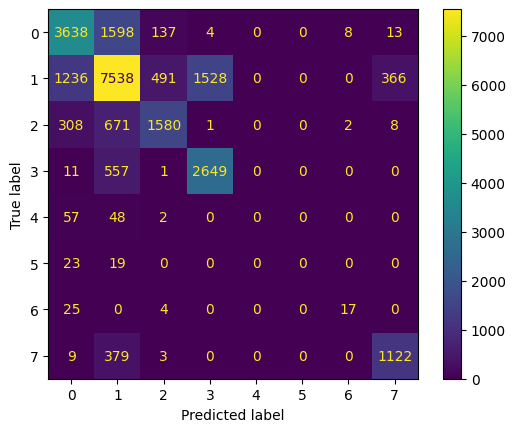

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred)).plot()